In [61]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

Constructing the graph

In [264]:
n = 30
p = 0.4
T = 10000

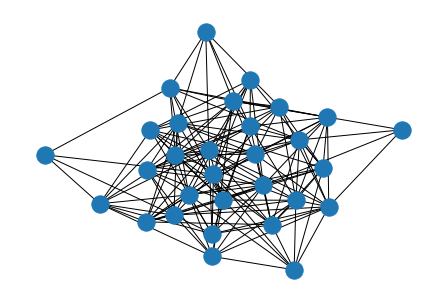

In [265]:
G1 = nx.gnp_random_graph(n,p)
nx.draw(G1)


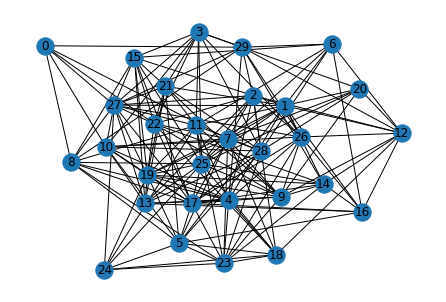

In [266]:
G2 = nx.gnp_random_graph(n,p)
nx.draw(G2,with_labels = True)

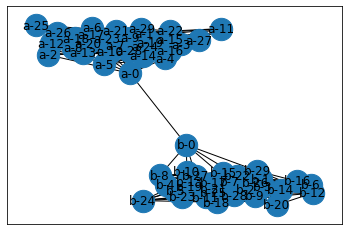

In [267]:
G = nx.union(G1,G2, rename=('a-', 'b-'))
G.add_edge('a-0', 'b-0')

nx.draw_networkx(G,with_labels=True,node_size=500)
plt.show()

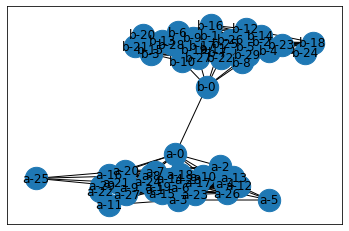

In [268]:
nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
nx.draw_networkx(G,with_labels=True,node_size=500)
plt.show()

Classical Random Walk

In [269]:
def random_walk_on_graph(graph, init_node,T):
    current_node = init_node
    for i in range(T):
        temp = list(graph.neighbors(current_node))
        if temp == 0:
            break
        else:
            new_node = random.choice(temp)
            current_node = new_node
    return current_node

In [270]:
results = []
shots = 10000
for t in range(shots):
    results.append(random_walk_on_graph(G,'a-6',T))



<AxesSubplot:>

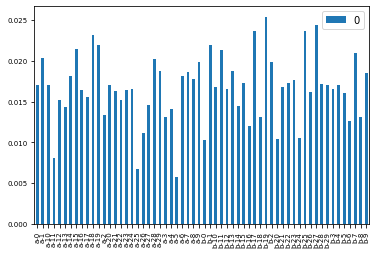

In [271]:
results.sort()
import pandas
from collections import Counter

letter_counts = Counter(results)
letter_counts = dict(sorted(letter_counts.items()))
for i in letter_counts.keys():
    letter_counts[i] = letter_counts[i]/shots
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',fontsize=7)

Quantum Random Walk

In [272]:
gamma = 1
A = nx.adjacency_matrix(G).todense()
H = A + np.identity(len(list(G.nodes())))
for i in range(len(list(G.nodes()))):
    for j in range(len(list(G.nodes()))):
        if (i == 0 and j == 0) or (i == (len(list(G.nodes()))-1) and j == (len(list(G.nodes()))-1)):
            H[i][j] = H[i][j] * 2 * gamma
        elif i == j:
            H[i][j] = H[i][j] * 3 * gamma
        elif H[i][j] != 0:
            H[i][j] = H[i][j] * (-gamma)

[0.029812595906622198, 0.014857066259619064, 0.0033504297560727333, 0.009243054252464944, 0.03290460699535519, 0.013147668017008955, 0.017360203772816305, 0.18198705960770756, 0.009632117845413768, 0.04522239556318699, 0.07013278876104274, 0.020308097970443223, 0.0032123612723204886, 0.0002215355807027438, 0.005443464512153217, 0.009377580502634745, 0.003736277105475377, 0.015508963482268791, 0.0004546197922856598, 0.040992615987953125, 0.0474859443036112, 0.0809274628598832, 0.03348180326472677, 0.0460486311560574, 0.022376739848387926, 0.03978724284962459, 0.017839133802431736, 0.011695788922836098, 0.007479920890783167, 0.054702306260588536, 0.0043945237662654625, 0.0007139594205386487, 0.0010695818237960303, 0.00012359206444833854, 0.0003475021654516315, 0.0166475093857699, 0.00045393817870527023, 0.006060842370678032, 0.002178948306057225, 0.0010199913736403294, 1.3198197164084195e-05, 0.002034699060794382, 0.002720721932314738, 0.005539360883512961, 0.004093536611285408, 0.013076

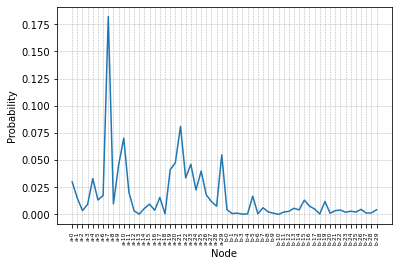

In [273]:
from scipy import linalg
here = 6
initial_state = [[0]]
for i in range(len(list(G.nodes())) - 1):
    if i != here:
        initial_state.append([0])
    elif i == here:
        initial_state.append([1])
initial_state = np.array(initial_state)
t_list = np.linspace(0.,1.,T)
unitary = [linalg.expm(-complex(0,1)*t*H) for t in t_list]
s = initial_state
for i in unitary:
    s = i.dot(s)
def modulus_c(a):
    r = a.real
    i = a.imag
    return np.sqrt(r**2 + i**2)
final_state = []
for i in s:
    final_state.append(modulus_c(i[0])*modulus_c(i[0]))
x = [i for i in list(G.nodes())]
plt.xlabel("Node")
plt.xticks(rotation='vertical',fontsize=6)
plt.ylabel("Probability")
plt.grid(linestyle="--", linewidth=0.5)
plt.plot(x,final_state)
print(final_state)